## Decision Tree

In [378]:
#Fraud dataset

In [427]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [380]:
data = pd.read_csv(r'D:\z Data Science\Assignment\Assignment\Assignment 11\Fraud_check.csv')

In [381]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [382]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [384]:
data_1 = data.rename(columns={'Marital.Status':'Marital_status','Taxable.Income':'Tax_income','Work.Experience':'Work_exp','City.Population':'City_population'})

In [385]:
data_1

,Undergrad,Marital_status,Tax_income,City_population,Work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [386]:
data_1 = data_1[['Undergrad','Marital_status','City_population','Work_exp','Urban','Tax_income']]

In [387]:
data_1

,Undergrad,Marital_status,City_population,Work_exp,Urban,Tax_income
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,76340
596,YES,Divorced,55369,2,YES,69967
597,NO,Divorced,154058,0,YES,47334
598,YES,Married,180083,17,NO,98592


In [388]:
data_1.duplicated().sum()

0

In [389]:
n = 0
for i in data_1['Tax_income']:
    if i <= 30000:
        data_1['Tax_income'][n] = 'Risky'
    else:
        data_1['Tax_income'][n] = 'Good'
    n += 1

<ipython-input-389-c62a137eaeb0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Tax_income'][n] = 'Good'
C:\Users\akshp\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\akshp\anaconda3\lib\site-packages\pandas\core\series.py:1008: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[key] = value
C:\Users\akshp\anaconda3

In [390]:
data_1['Tax_income'].unique()

array(['Good', 'Risky'], dtype=object)

In [391]:
data_1.Tax_income.value_counts()

Good     476
Risky    124
Name: Tax_income, dtype: int64

In [392]:
data_1.columns

Index(['Undergrad', 'Marital_status', 'City_population', 'Work_exp', 'Urban',
       'Tax_income'],
      dtype='object')

In [393]:
data_1['Undergrad'] = data_1['Undergrad'].map({'NO' : 0, 'YES' : 1})
data_1['Marital_status'] = data_1['Marital_status'].map({'Single' : 0, 'Married' : 1, 'Divorced' : 2})
data_1['Urban'] = data_1['Urban'].map({'NO' : 0, 'YES' : 1})
data_1

,Undergrad,Marital_status,City_population,Work_exp,Urban,Tax_income
0,0,0,50047,10,1,Good
1,1,2,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,0,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,2,39492,7,1,Good
596,1,2,55369,2,1,Good
597,0,2,154058,0,1,Good
598,1,1,180083,17,0,Good


In [394]:
x=data_1.iloc[:,0:4]
y=data_1['Tax_income']

In [395]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Tax_income, Length: 600, dtype: object

In [396]:
x

,Undergrad,Marital_status,City_population,Work_exp
0,0,0,50047,10
1,1,2,134075,18
2,0,1,160205,30
3,1,0,193264,15
4,0,1,27533,28
...,...,...,...,...
595,1,2,39492,7
596,1,2,55369,2
597,0,2,154058,0
598,1,1,180083,17


In [397]:
x_train, x_test, y_train, y_test = train_test_split(x , y)
tree = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [409]:
predictions = tree.predict(X_test)
pred_df = pd.DataFrame()
pred_df['Actual'] = y_test
pred_df['Predicted'] = predictions
pred_df

,Actual,Predicted
474,Good,Good
452,Good,Good
381,Good,Good
477,Good,Good
258,Good,Good
...,...,...
229,Good,Good
195,Good,Good
331,Risky,Good
413,Good,Good


In [410]:
np.mean(y_test == predictions)

0.7933333333333333

In [405]:
# CART using gini criteria

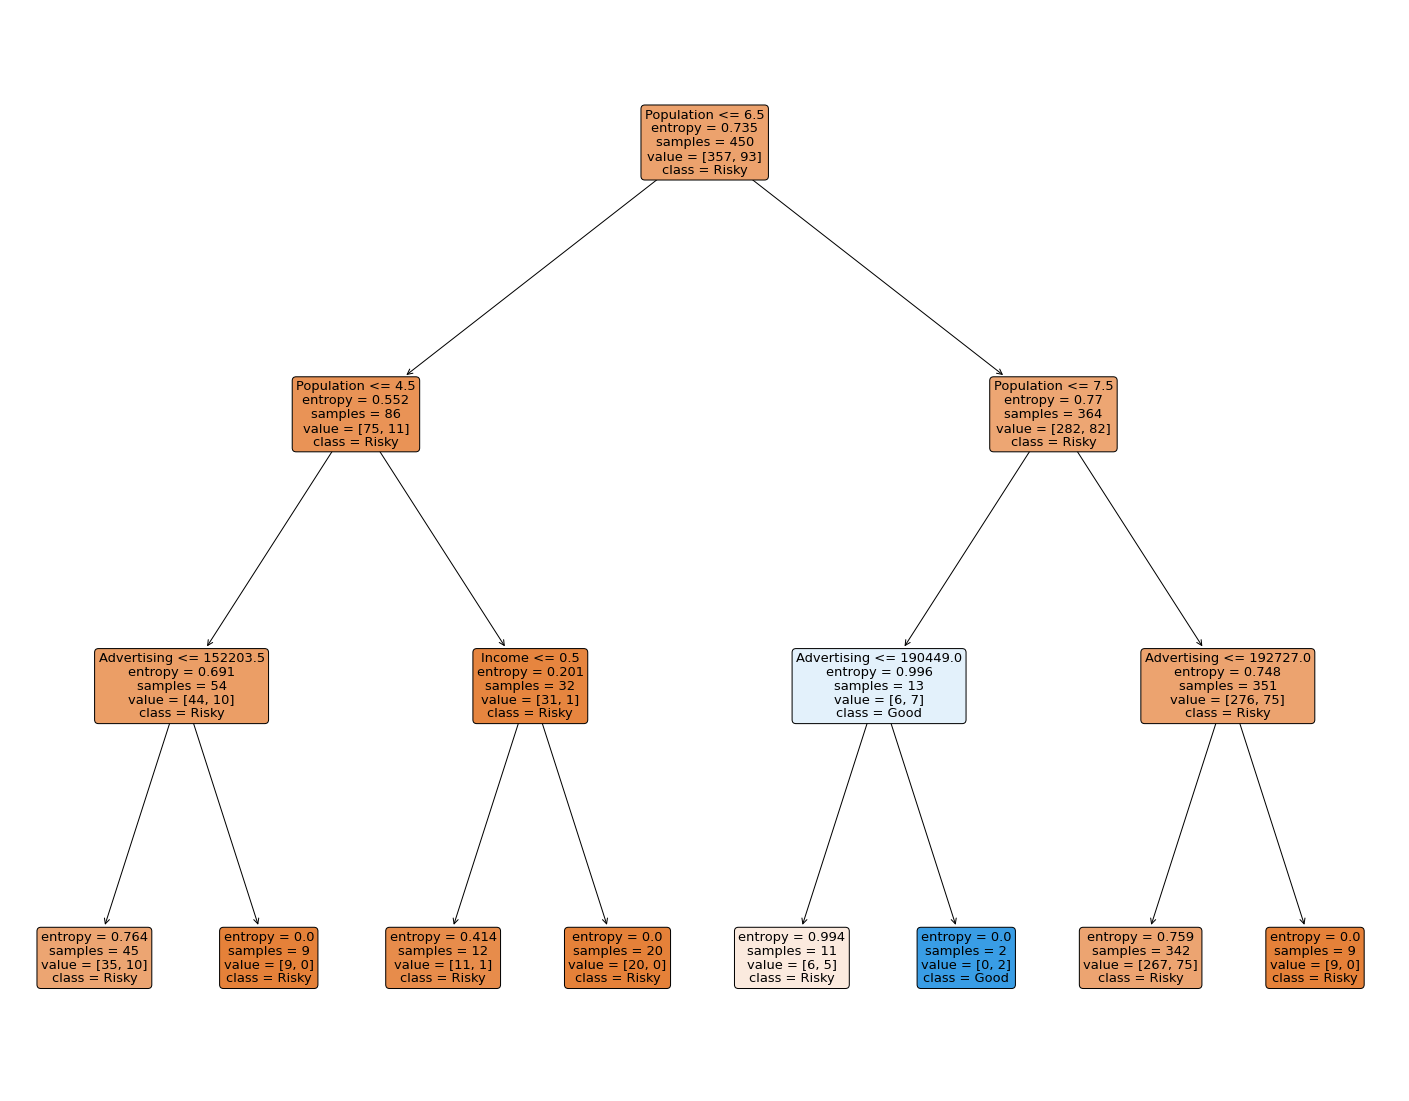

In [411]:
from sklearn.tree import plot_tree
plt.figure(figsize = (25,20))
plot_tree(tree, filled = True, rounded = True, class_names = ['Risky', 'Good'], feature_names = X.columns)
plt.show()

In [412]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [413]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [418]:
predictions = model_gini.predict(x_test)
pred_df = pd.DataFrame()
pred_df['Actual'] = y_test
pred_df['Predictions'] = predictions
pred_df

,Actual,Predictions
474,Good,Good
452,Good,Good
381,Good,Good
477,Good,Good
258,Good,Good
...,...,...
229,Good,Good
195,Good,Good
331,Risky,Good
413,Good,Good


In [419]:
np.mean(predictions == y_test)

0.7866666666666666

In [421]:
cf_mat = confusion_matrix(y_test, predictions)
cf_mat

array([[117,   2],
       [ 30,   1]], dtype=int64)

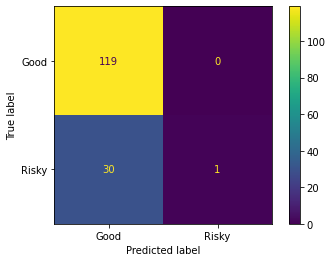

In [428]:
plot_confusion_matrix(model_gini, X_test, y_test)

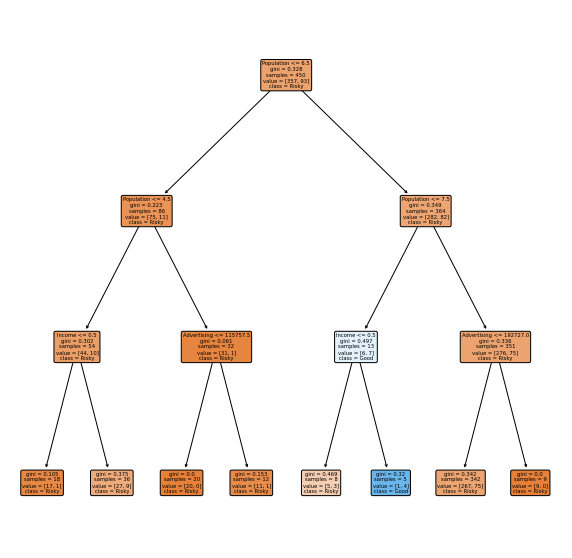

In [425]:
plt.figure(figsize = (10,10))
plot_tree(model_gini, filled = True, rounded = True, class_names = ['Risky', 'Good'], feature_names = X.columns)
plt.show()

## 2 : Company Dataset

In [264]:
import seaborn as sns

In [259]:
df=pd.read_csv(r'D:\z Data Science\Assignment\Assignment\Assignment 11\Company_Data.csv')

In [260]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [265]:
df.describe(include = 'all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


C:\Users\akshp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

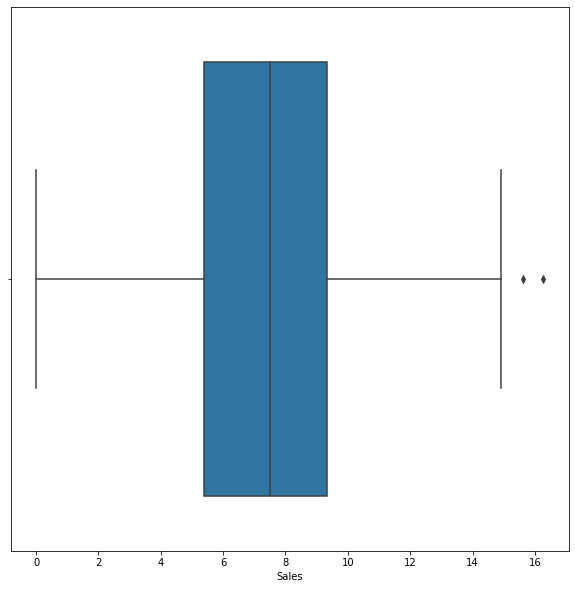

In [266]:
plt.figure(figsize = (10,10))
sns.boxplot(df['Sales'], orient = '')

In [267]:
np.percentile(df['Sales'] , 25)

5.390000000000001

In [269]:
data = df.copy()

In [278]:
x = 0
for i in df['Sales']:
    if i < np.percentile(df['Sales'] , 33):
        data['Sales'][x] = 'Low'
    elif np.percentile(df['Sales'] , 33) <= i <  np.percentile(df['Sales'] , 90):
        data['Sales'][x] = 'Average'
    else:
        data['Sales'][x] = 'High'
    x += 1

<ipython-input-278-56c74d7c73d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'][x] = 'Average'
<ipython-input-278-56c74d7c73d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'][x] = 'Low'
<ipython-input-278-56c74d7c73d5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'][x] = 'High'


In [273]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Average,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Average,111,48,16,260,83,Good,65,10,Yes,Yes
2,Average,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Average,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Average,139,23,3,37,120,Medium,55,11,No,Yes
397,Average,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [274]:
inputs = data.drop('Sales', axis = 1)

In [275]:
y = data['Sales']
X= pd.get_dummies(inputs, drop_first = True)
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state = 42)

In [276]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1
1,111,48,16,260,83,65,10,1,0,1,1
2,113,35,10,269,80,59,12,0,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,1
396,139,23,3,37,120,55,11,0,1,0,1
397,162,26,12,368,159,40,18,0,1,1,1
398,100,79,7,284,95,50,12,0,0,1,1


In [287]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state = 42)

In [288]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [280]:
predictions = tree.predict(X_test)
np.mean(predictions == y_test)

0.64

In [281]:
pred_df = pd.DataFrame()
pred_df['Actual'] = y_test
pred_df['Predicted'] = predictions
pred_df

,Actual,Predicted
209,Low,Average
280,Low,Low
33,Average,Average
210,Low,Low
93,Average,Average
...,...,...
314,Average,High
373,Low,Average
380,Average,Average
239,Low,Low


In [293]:
from sklearn.metrics import confusion_matrix
cf_mat = confusion_matrix(y_test, predictions)
cf_mat

array([[37,  5, 13],
       [ 9,  5,  0],
       [ 9,  0, 22]], dtype=int64)

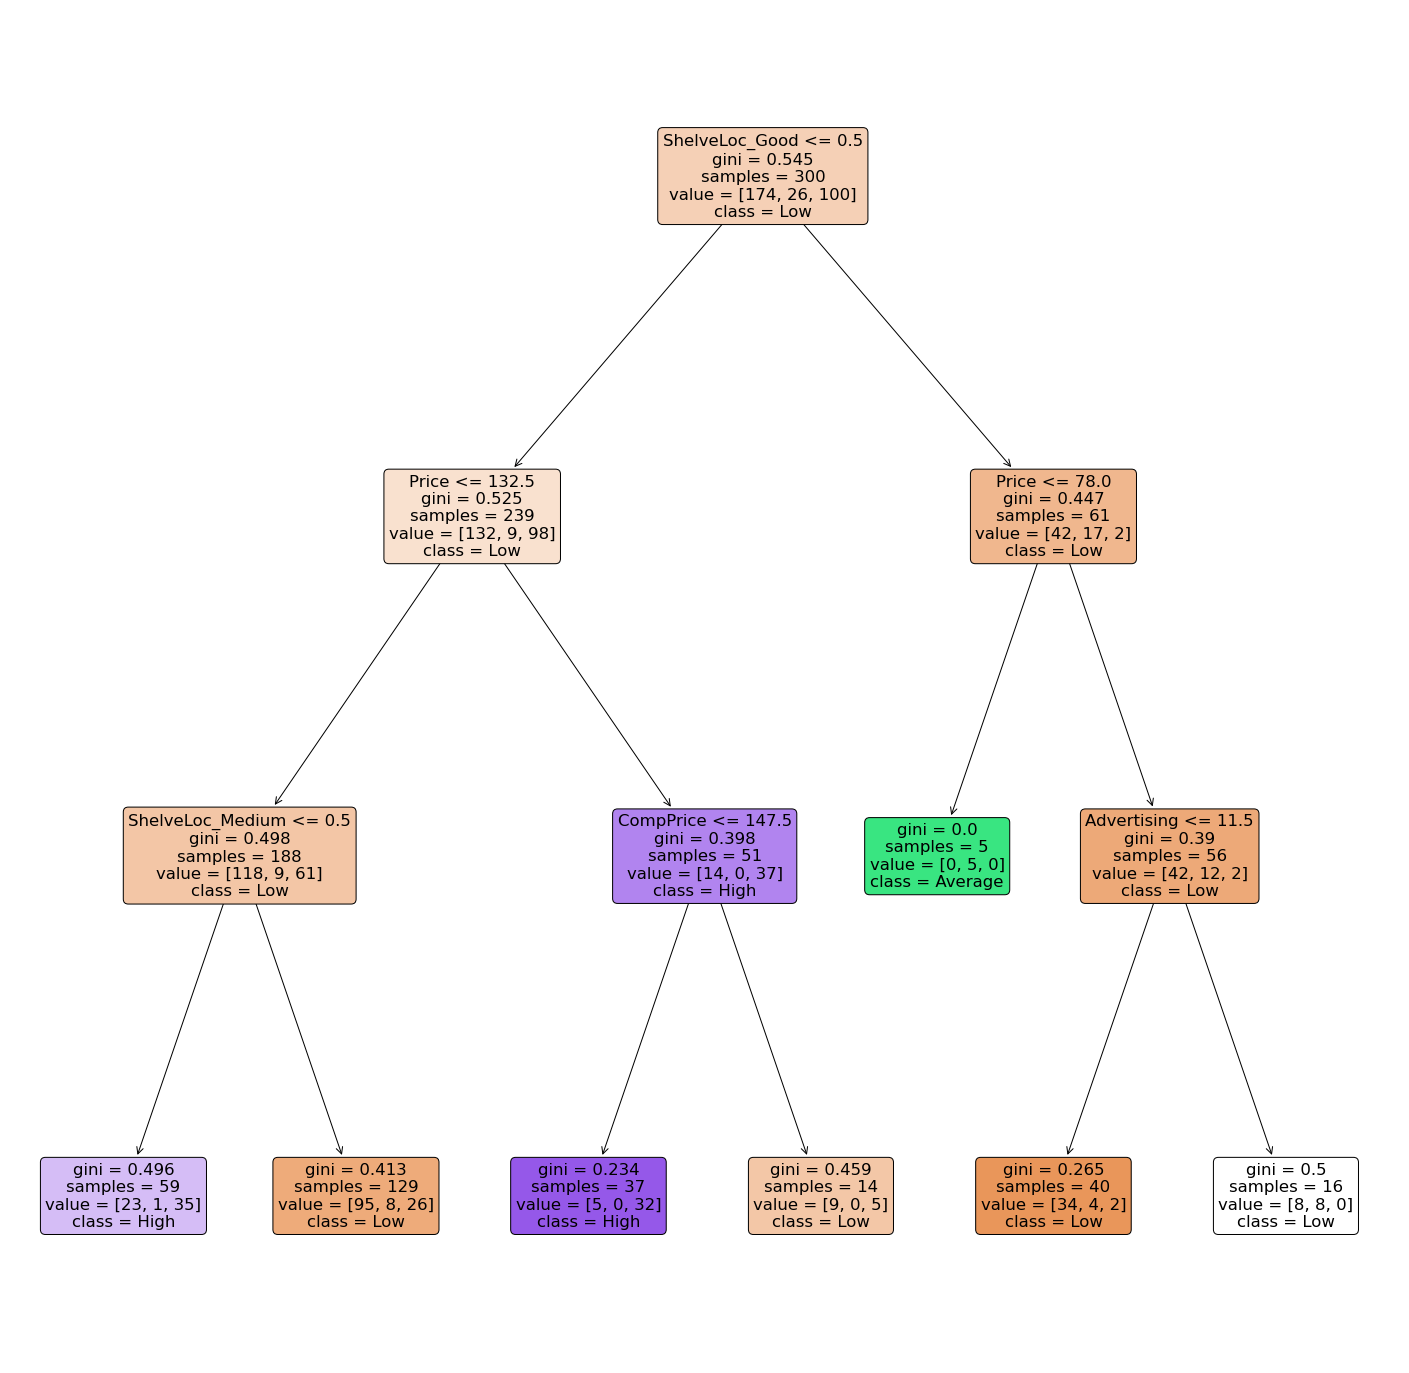

In [294]:
plt.figure(figsize = (25,25))
plot_tree(tree, filled = True, rounded = True, feature_names = X.columns, class_names = ['Low', 'Average', 'High'])
plt.show()